# New York City Taxi Trip Duration

In this competition, Kaggle is challenging you to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as


Where:

ϵ is the RMSLE value (score)<br>
n is the total number of observations in the (public/private) data set,<br>
pi is your prediction of trip duration, and<br>
ai is the actual trip duration for i.<br>
log(x) is the natural logarithm of x<br>

Submission File<br>

For every row in the dataset, submission files should contain two columns: id and trip_duration.  The id corresponds to the column of that id in the test.csv. The file should contain a header and have the following format:

|id |trip_duration|
|:-:|:-:|
|id00001|978|
|id00002|978|
|id00003|978|
|id00004|978|


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import plotly.offline as py_offline
import plotly.plotly as py
import plotly.graph_objs as go

py_offline.init_notebook_mode(connected=True)

In [20]:
#load all the data and display

df = pd.read_csv('train.csv')

df.head()
# df.shape

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## visualization

In [21]:
df.shape

(1458644, 11)

In [22]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Base on the number above, the data has been preprocessed, because there is no null entry

In [23]:
#which vendor is the most popular
vendor = df.vendor_id.value_counts()

num_vendor = pd.Series(vendor).values
print(vendor)
print(num_vendor)

2    780302
1    678342
Name: vendor_id, dtype: int64
[780302 678342]


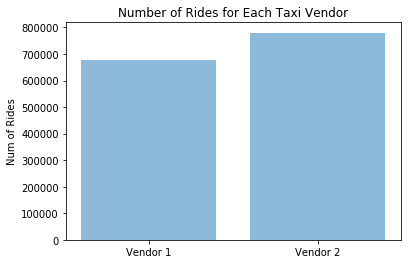

In [24]:
objects = ('Vendor 1', 'Vendor 2')
y_pos = np.arange(len(objects))

num_vendor = num_vendor[::-1]
 
plt.bar(y_pos, num_vendor, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Num of Rides')
plt.title('Number of Rides for Each Taxi Vendor')
 
plt.show()

In [49]:
#plot the num of ride base on month
print("pick up time range")
print(df.pickup_datetime.max())
print(df.pickup_datetime.min())

print("Drop off time range")
print(df.dropoff_datetime.max())
print(df.dropoff_datetime.min())

df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)


pick up time range
2016-06-30 23:59:39
2016-01-01 00:00:17
Drop off time range
2016-07-01 23:02:03
2016-01-01 00:03:31


## Add new features

In [50]:
df['pick_month'] = df.pickup_datetime.dt.month
df['pick_weekday'] = df.pickup_datetime.dt.weekday+1
df['pick_minuteofday'] = df.pickup_datetime.dt.hour*60 + df.pickup_datetime.dt.minute

In [51]:
week_rides = df.pick_weekday.value_counts()

In [52]:
df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,pick_weekday,pick_minuteofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455,3,1,1044


In [53]:
month = df.pickup_datetime.dt.month.value_counts()


In [54]:
month.sort_index()

1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: pickup_datetime, dtype: int64

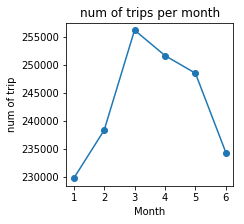

In [55]:
plt.figure(figsize=(3, 3))
labels = [1, 2, 3, 4, 5, 6]
sizes = month.sort_index().values
# plt.show()
plt.plot(labels, sizes, '-o')
# plt.xticks(x_axis)
plt.ylabel('num of trip')
plt.xlabel('Month')
plt.xticks(labels)
plt.title('num of trips per month')

plt.savefig('testplot.png')

In [63]:
duration = df['trip_duration'].where(df['pick_month'] == 1)
duration.dropna().values

array([ 2124.,   443.,   707., ...,   244.,   655.,   373.])

In [59]:
month_duration = []
month = []
for i in range(1, 7):
    duration = df['trip_duration'].where(df['pick_month'] == i)
    duration = duration.dropna().values
    mean = np.mean(duration)
    month_duration.append(mean)
    month.append(i)

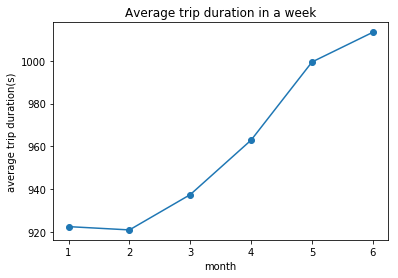

In [60]:
plt.plot(month, month_duration, '-o')
# plt.xticks(x_axis)
plt.ylabel('average trip duration(s)')
plt.xlabel('month')
plt.title('Average trip duration in a week')
#plt.show()
plt.savefig('duration_week.png')

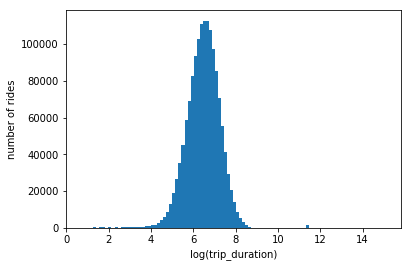

In [23]:

df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)

plt.hist(df['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of rides')
#plt.show()
plt.savefig('duration.png')

## plot the average duration through the day

In [34]:
mean_duration = []
weekday = []
for i in range(0, 7):
    duration = df['trip_duration'].where(df.pickup_datetime.dt.weekday == i)
    duration = duration.dropna().values
    mean = np.mean(duration)
    mean_duration.append(mean)
    weekday.append(i+1)

In [35]:
mean_duration

[897.94783852138005,
 983.46312435573043,
 975.4504939658126,
 1006.5286539112611,
 990.22419955890177,
 948.05117536266005,
 901.63939477698273]

In [36]:
weekday

[1, 2, 3, 4, 5, 6, 7]

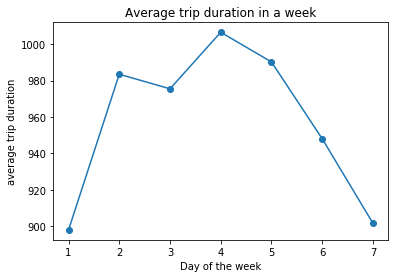

In [76]:
plt.plot(weekday, mean_duration, '-o')
# plt.xticks(x_axis)
plt.ylabel('average trip duration')
plt.xlabel('Day of the week')
plt.title('Average trip duration in a week')
#plt.show()
plt.savefig('duration_week.png')

In [32]:
df.pick_weekday.value_counts().sort_index().values/25

array([ 7496.72,  8109.96,  8405.44,  8742.96,  8941.32,  8834.72,  7814.64])

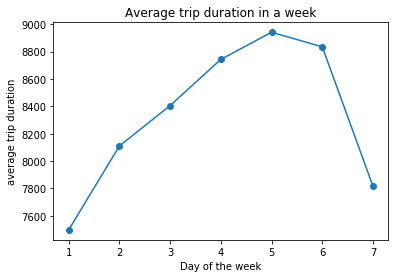

In [37]:
week_rides = df.pick_weekday.value_counts().sort_index().values/25
plt.plot(weekday, week_rides, '-o')
# plt.xticks(x_axis)
plt.ylabel('average trip duration')
plt.xlabel('Day of the week')
plt.title('Average trip duration in a week')
#plt.show()
plt.savefig('duration_week.png')

In [11]:
#plot the rides vs hours
hour_rides = df.pickup_datetime.dt.hour.value_counts().sort_index()

In [78]:
hour_rides

0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: pickup_datetime, dtype: int64

In [90]:
a = df.pickup_datetime.dt.date.max()- df.pickup_datetime.dt.date.min()

In [92]:
a

datetime.timedelta(181)

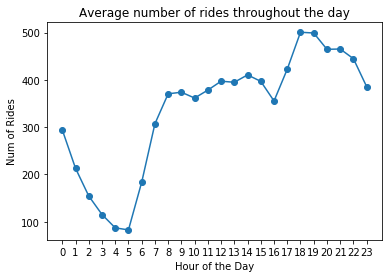

In [94]:
x_axis = hour_rides.index.values
y_axis = (hour_rides.values / 181)

# plt.scatter(x_axis, y_axis)
plt.plot(x_axis, y_axis, '-o')
plt.xticks(x_axis)
plt.ylabel('Num of Rides')
plt.xlabel('Hour of the Day')
plt.title('Average number of rides throughout the day')
# plt.show()
plt.savefig('busy_hour.png')

### trip duration

In [122]:
duration = df.trip_duration.value_counts().sort_index()
x_axis = duration.index.values
y_axis = duration.values

### Visualize the drop off and pick up 

In [123]:
pickup_minute_of_the_day = df.pickup_datetime.dt.hour*60 + df.pickup_datetime.dt.minute

In [124]:
# %%time
# test = df.take(np.random.permutation(len(df))[:2000])



# X_pick = df['pickup_longitude'].iloc[0:1500]
# y_pick = df['pickup_latitude'].iloc[0:1500]



# X_drop = df['dropoff_longitude'].iloc[0:1500]
# y_drop = df['dropoff_latitude'].iloc[0:1500]

# trace = go.Scattergeo(locationmode = 'USA-states',
#         lon = X_pick,
#         lat = y_pick,
#         text = "Pick Up Location",
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'square',
#             line = dict(
#                 width=1,
#                 color='rgba(102, 102, 102)'
#             ),
       
#         )
#     )

# trace_2 = go.Scattergeo(locationmode = 'USA-states',
#         lon = X_drop,
#         lat = y_drop,
#         text = "Drop Off Location",
#         mode = 'markers',
#         marker = dict(
#             size = 8,
#             opacity = 0.8,
#             reversescale = True,
#             autocolorscale = False,
#             symbol = 'circle',
#             line = dict(
#                 width=1,
#                 color='rgba(255, 0, 0, 0.4)'
#             ),
       
#         )
#     )

# layout = dict(
#         title = 'NYC Taxi pick/drop location',
# #         colorbar = True,
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
# #             projection=dict( type = 'Mercator' ),
#             showland = True,
#             landcolor = "rgb(250, 250, 250)",
#             subunitcolor = "rgb(217, 217, 217)",
#             countrycolor = "rgb(217, 217, 217)",
#             countrywidth = 0.5,
#             subunitwidth = 0.5,
            
#             lonaxis = dict( range= [ -74.05, -73] ),
#             lataxis = dict( range= [40.5, 41] ),
            
#             center = dict(lon= -73.980415, lat =40.763939)
            
#         ),
#     )

# fig = dict( data=[trace, trace_2], layout=layout )
# py_offline.iplot(fig, validate=False,)

# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter(X_pick, y_pick, c='b', marker="s", label='Pick up location')
# ax1.scatter(X_drop,y_drop, c='r', marker="o", label='Drop off location')
# plt.legend(loc='upper left');
# plt.show()


In [125]:
y = df['trip_duration']
X = df.drop(['id', 'store_and_fwd_flag', 'pickup_datetime', 'trip_duration', 'dropoff_datetime', 'pick_month', 'pick_weekday', 'pick_minuteofday'], axis=1)
# print  the number of occurance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [126]:
#error function: RMLSE
from sklearn.metrics import mean_squared_error
def calculate_error(y_test, y_pred):

    log_test = np.log(y_test+1)
    log_pred = np.log(y_pred+1)
    RMSE = np.sqrt(mean_squared_error(log_test, log_pred))
    
    return RMSE


In [127]:
from sklearn.ensemble import RandomForestRegressor as RFR

result_table = pd.DataFrame(columns =['num_est', 
                                      'max_depth', 
                                      'min_samples', 
                                      'error'])

num_iterations = 20

for i in range (num_iterations):
    num_est = np.random.randint(50, 200)
    max_depth = np.random.randint(10, 30)
    min_samples_split = np.random.randint(30,70)
    regr = RFR(n_estimators = num_est,
          max_depth = max_depth,
          min_samples_split = min_samples_split,
          verbose = 2,
          random_state = 2)

    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    rmlse = calculate_error(y_pred, y_test)
    
    row = pd.DataFrame([[num_est, 
                             max_depth, 
                             min_samples_split,
                        rmlse]],
                         columns =['num_est', 
                                      'max_depth', 
                                      'min_samples', 
                                      'error'])
                            
    
    result_table = result_table.append(row, ignore_index= True)

building tree 1 of 124


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


building tree 2 of 124
building tree 3 of 124
building tree 4 of 124
building tree 5 of 124
building tree 6 of 124
building tree 7 of 124
building tree 8 of 124
building tree 9 of 124
building tree 10 of 124
building tree 11 of 124
building tree 12 of 124
building tree 13 of 124
building tree 14 of 124
building tree 15 of 124
building tree 16 of 124
building tree 17 of 124
building tree 18 of 124
building tree 19 of 124
building tree 20 of 124
building tree 21 of 124
building tree 22 of 124
building tree 23 of 124
building tree 24 of 124
building tree 25 of 124
building tree 26 of 124
building tree 27 of 124
building tree 28 of 124
building tree 29 of 124
building tree 30 of 124
building tree 31 of 124
building tree 32 of 124
building tree 33 of 124
building tree 34 of 124
building tree 35 of 124
building tree 36 of 124
building tree 37 of 124
building tree 38 of 124
building tree 39 of 124
building tree 40 of 124
building tree 41 of 124
building tree 42 of 124
building tree 43 of 124


[Parallel(n_jobs=1)]: Done 124 out of 124 | elapsed: 16.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 124 out of 124 | elapsed:   13.0s finished


building tree 1 of 101


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


building tree 2 of 101
building tree 3 of 101
building tree 4 of 101
building tree 5 of 101
building tree 6 of 101
building tree 7 of 101
building tree 8 of 101
building tree 9 of 101
building tree 10 of 101
building tree 11 of 101
building tree 12 of 101
building tree 13 of 101
building tree 14 of 101
building tree 15 of 101
building tree 16 of 101
building tree 17 of 101
building tree 18 of 101
building tree 19 of 101
building tree 20 of 101
building tree 21 of 101
building tree 22 of 101
building tree 23 of 101
building tree 24 of 101
building tree 25 of 101
building tree 26 of 101
building tree 27 of 101
building tree 28 of 101
building tree 29 of 101
building tree 30 of 101
building tree 31 of 101
building tree 32 of 101
building tree 33 of 101
building tree 34 of 101
building tree 35 of 101
building tree 36 of 101
building tree 37 of 101
building tree 38 of 101
building tree 39 of 101
building tree 40 of 101
building tree 41 of 101
building tree 42 of 101
building tree 43 of 101


[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:  9.5min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:    4.9s finished


building tree 1 of 192


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


building tree 2 of 192
building tree 3 of 192
building tree 4 of 192
building tree 5 of 192
building tree 6 of 192
building tree 7 of 192
building tree 8 of 192
building tree 9 of 192
building tree 10 of 192
building tree 11 of 192
building tree 12 of 192
building tree 13 of 192
building tree 14 of 192
building tree 15 of 192
building tree 16 of 192
building tree 17 of 192
building tree 18 of 192
building tree 19 of 192
building tree 20 of 192
building tree 21 of 192
building tree 22 of 192
building tree 23 of 192
building tree 24 of 192
building tree 25 of 192
building tree 26 of 192
building tree 27 of 192
building tree 28 of 192
building tree 29 of 192
building tree 30 of 192
building tree 31 of 192
building tree 32 of 192
building tree 33 of 192
building tree 34 of 192
building tree 35 of 192
building tree 36 of 192
building tree 37 of 192
building tree 38 of 192
building tree 39 of 192
building tree 40 of 192
building tree 41 of 192
building tree 42 of 192
building tree 43 of 192


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 19.3min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   10.3s finished


building tree 1 of 73


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


building tree 2 of 73
building tree 3 of 73
building tree 4 of 73
building tree 5 of 73
building tree 6 of 73
building tree 7 of 73
building tree 8 of 73
building tree 9 of 73
building tree 10 of 73
building tree 11 of 73
building tree 12 of 73
building tree 13 of 73
building tree 14 of 73
building tree 15 of 73
building tree 16 of 73
building tree 17 of 73
building tree 18 of 73
building tree 19 of 73
building tree 20 of 73
building tree 21 of 73
building tree 22 of 73
building tree 23 of 73
building tree 24 of 73
building tree 25 of 73
building tree 26 of 73
building tree 27 of 73
building tree 28 of 73
building tree 29 of 73
building tree 30 of 73
building tree 31 of 73
building tree 32 of 73
building tree 33 of 73
building tree 34 of 73
building tree 35 of 73
building tree 36 of 73
building tree 37 of 73
building tree 38 of 73
building tree 39 of 73
building tree 40 of 73
building tree 41 of 73
building tree 42 of 73
building tree 43 of 73
building tree 44 of 73
building tree 45 of

[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:  6.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:    2.8s finished


building tree 1 of 138


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


building tree 2 of 138
building tree 3 of 138
building tree 4 of 138
building tree 5 of 138
building tree 6 of 138
building tree 7 of 138
building tree 8 of 138
building tree 9 of 138
building tree 10 of 138
building tree 11 of 138
building tree 12 of 138
building tree 13 of 138
building tree 14 of 138
building tree 15 of 138
building tree 16 of 138
building tree 17 of 138
building tree 18 of 138
building tree 19 of 138
building tree 20 of 138
building tree 21 of 138
building tree 22 of 138
building tree 23 of 138
building tree 24 of 138
building tree 25 of 138
building tree 26 of 138
building tree 27 of 138
building tree 28 of 138
building tree 29 of 138
building tree 30 of 138
building tree 31 of 138
building tree 32 of 138
building tree 33 of 138
building tree 34 of 138
building tree 35 of 138
building tree 36 of 138
building tree 37 of 138
building tree 38 of 138
building tree 39 of 138
building tree 40 of 138
building tree 41 of 138
building tree 42 of 138
building tree 43 of 138


[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed: 14.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed:    8.1s finished


building tree 1 of 94


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


building tree 2 of 94
building tree 3 of 94
building tree 4 of 94
building tree 5 of 94
building tree 6 of 94
building tree 7 of 94
building tree 8 of 94
building tree 9 of 94
building tree 10 of 94
building tree 11 of 94
building tree 12 of 94
building tree 13 of 94
building tree 14 of 94
building tree 15 of 94
building tree 16 of 94
building tree 17 of 94
building tree 18 of 94
building tree 19 of 94
building tree 20 of 94
building tree 21 of 94
building tree 22 of 94
building tree 23 of 94
building tree 24 of 94
building tree 25 of 94
building tree 26 of 94
building tree 27 of 94
building tree 28 of 94
building tree 29 of 94
building tree 30 of 94
building tree 31 of 94
building tree 32 of 94
building tree 33 of 94
building tree 34 of 94
building tree 35 of 94
building tree 36 of 94
building tree 37 of 94
building tree 38 of 94
building tree 39 of 94
building tree 40 of 94
building tree 41 of 94
building tree 42 of 94
building tree 43 of 94
building tree 44 of 94
building tree 45 of

[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:  8.9min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    4.6s finished


building tree 1 of 163


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


building tree 2 of 163
building tree 3 of 163
building tree 4 of 163
building tree 5 of 163
building tree 6 of 163
building tree 7 of 163
building tree 8 of 163
building tree 9 of 163
building tree 10 of 163
building tree 11 of 163
building tree 12 of 163
building tree 13 of 163
building tree 14 of 163
building tree 15 of 163
building tree 16 of 163
building tree 17 of 163
building tree 18 of 163
building tree 19 of 163
building tree 20 of 163
building tree 21 of 163
building tree 22 of 163
building tree 23 of 163
building tree 24 of 163
building tree 25 of 163
building tree 26 of 163
building tree 27 of 163
building tree 28 of 163
building tree 29 of 163
building tree 30 of 163
building tree 31 of 163
building tree 32 of 163
building tree 33 of 163
building tree 34 of 163
building tree 35 of 163
building tree 36 of 163
building tree 37 of 163
building tree 38 of 163
building tree 39 of 163
building tree 40 of 163
building tree 41 of 163
building tree 42 of 163
building tree 43 of 163


[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed: 25.8min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 163 out of 163 | elapsed:   25.3s finished


building tree 1 of 54


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


building tree 2 of 54
building tree 3 of 54
building tree 4 of 54
building tree 5 of 54
building tree 6 of 54
building tree 7 of 54
building tree 8 of 54
building tree 9 of 54
building tree 10 of 54
building tree 11 of 54
building tree 12 of 54
building tree 13 of 54
building tree 14 of 54
building tree 15 of 54
building tree 16 of 54
building tree 17 of 54
building tree 18 of 54
building tree 19 of 54
building tree 20 of 54
building tree 21 of 54
building tree 22 of 54
building tree 23 of 54
building tree 24 of 54
building tree 25 of 54
building tree 26 of 54
building tree 27 of 54
building tree 28 of 54
building tree 29 of 54
building tree 30 of 54
building tree 31 of 54
building tree 32 of 54
building tree 33 of 54
building tree 34 of 54
building tree 35 of 54
building tree 36 of 54
building tree 37 of 54
building tree 38 of 54
building tree 39 of 54
building tree 40 of 54
building tree 41 of 54
building tree 42 of 54
building tree 43 of 54
building tree 44 of 54
building tree 45 of

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  7.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    6.2s finished


building tree 1 of 69


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


building tree 2 of 69
building tree 3 of 69
building tree 4 of 69
building tree 5 of 69
building tree 6 of 69
building tree 7 of 69
building tree 8 of 69
building tree 9 of 69
building tree 10 of 69
building tree 11 of 69
building tree 12 of 69
building tree 13 of 69
building tree 14 of 69
building tree 15 of 69
building tree 16 of 69
building tree 17 of 69
building tree 18 of 69
building tree 19 of 69
building tree 20 of 69
building tree 21 of 69
building tree 22 of 69
building tree 23 of 69
building tree 24 of 69
building tree 25 of 69
building tree 26 of 69
building tree 27 of 69
building tree 28 of 69
building tree 29 of 69
building tree 30 of 69
building tree 31 of 69
building tree 32 of 69
building tree 33 of 69
building tree 34 of 69
building tree 35 of 69
building tree 36 of 69
building tree 37 of 69
building tree 38 of 69
building tree 39 of 69
building tree 40 of 69
building tree 41 of 69
building tree 42 of 69
building tree 43 of 69
building tree 44 of 69
building tree 45 of

[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:  6.1min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.9s finished


building tree 1 of 65


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


building tree 2 of 65
building tree 3 of 65
building tree 4 of 65
building tree 5 of 65
building tree 6 of 65
building tree 7 of 65
building tree 8 of 65
building tree 9 of 65
building tree 10 of 65
building tree 11 of 65
building tree 12 of 65
building tree 13 of 65
building tree 14 of 65
building tree 15 of 65
building tree 16 of 65
building tree 17 of 65
building tree 18 of 65
building tree 19 of 65
building tree 20 of 65
building tree 21 of 65
building tree 22 of 65
building tree 23 of 65
building tree 24 of 65
building tree 25 of 65
building tree 26 of 65
building tree 27 of 65
building tree 28 of 65
building tree 29 of 65
building tree 30 of 65
building tree 31 of 65
building tree 32 of 65
building tree 33 of 65
building tree 34 of 65
building tree 35 of 65
building tree 36 of 65
building tree 37 of 65
building tree 38 of 65
building tree 39 of 65
building tree 40 of 65
building tree 41 of 65
building tree 42 of 65
building tree 43 of 65
building tree 44 of 65
building tree 45 of

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  9.3min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    8.0s finished


building tree 1 of 131


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


building tree 2 of 131
building tree 3 of 131
building tree 4 of 131
building tree 5 of 131
building tree 6 of 131
building tree 7 of 131
building tree 8 of 131
building tree 9 of 131
building tree 10 of 131
building tree 11 of 131
building tree 12 of 131
building tree 13 of 131
building tree 14 of 131
building tree 15 of 131
building tree 16 of 131
building tree 17 of 131
building tree 18 of 131
building tree 19 of 131
building tree 20 of 131
building tree 21 of 131
building tree 22 of 131
building tree 23 of 131
building tree 24 of 131
building tree 25 of 131
building tree 26 of 131
building tree 27 of 131
building tree 28 of 131
building tree 29 of 131
building tree 30 of 131
building tree 31 of 131
building tree 32 of 131
building tree 33 of 131
building tree 34 of 131
building tree 35 of 131
building tree 36 of 131
building tree 37 of 131
building tree 38 of 131
building tree 39 of 131
building tree 40 of 131
building tree 41 of 131
building tree 42 of 131
building tree 43 of 131


[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed: 17.0min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 131 out of 131 | elapsed:   12.2s finished


building tree 1 of 198


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


building tree 2 of 198
building tree 3 of 198
building tree 4 of 198
building tree 5 of 198
building tree 6 of 198
building tree 7 of 198
building tree 8 of 198
building tree 9 of 198
building tree 10 of 198
building tree 11 of 198
building tree 12 of 198
building tree 13 of 198
building tree 14 of 198
building tree 15 of 198
building tree 16 of 198
building tree 17 of 198
building tree 18 of 198
building tree 19 of 198
building tree 20 of 198
building tree 21 of 198
building tree 22 of 198
building tree 23 of 198
building tree 24 of 198
building tree 25 of 198
building tree 26 of 198
building tree 27 of 198
building tree 28 of 198
building tree 29 of 198
building tree 30 of 198
building tree 31 of 198
building tree 32 of 198
building tree 33 of 198
building tree 34 of 198
building tree 35 of 198
building tree 36 of 198
building tree 37 of 198
building tree 38 of 198
building tree 39 of 198
building tree 40 of 198
building tree 41 of 198
building tree 42 of 198
building tree 43 of 198


[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed: 16.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:    7.6s finished


building tree 1 of 175


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


building tree 2 of 175
building tree 3 of 175
building tree 4 of 175
building tree 5 of 175
building tree 6 of 175
building tree 7 of 175
building tree 8 of 175
building tree 9 of 175
building tree 10 of 175
building tree 11 of 175
building tree 12 of 175
building tree 13 of 175
building tree 14 of 175
building tree 15 of 175
building tree 16 of 175
building tree 17 of 175
building tree 18 of 175
building tree 19 of 175
building tree 20 of 175
building tree 21 of 175
building tree 22 of 175
building tree 23 of 175
building tree 24 of 175
building tree 25 of 175
building tree 26 of 175
building tree 27 of 175
building tree 28 of 175
building tree 29 of 175
building tree 30 of 175
building tree 31 of 175
building tree 32 of 175
building tree 33 of 175
building tree 34 of 175
building tree 35 of 175
building tree 36 of 175
building tree 37 of 175
building tree 38 of 175
building tree 39 of 175
building tree 40 of 175
building tree 41 of 175
building tree 42 of 175
building tree 43 of 175


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 24.7min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   20.4s finished


building tree 1 of 107


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


building tree 2 of 107
building tree 3 of 107
building tree 4 of 107
building tree 5 of 107
building tree 6 of 107
building tree 7 of 107
building tree 8 of 107
building tree 9 of 107
building tree 10 of 107
building tree 11 of 107
building tree 12 of 107
building tree 13 of 107
building tree 14 of 107
building tree 15 of 107
building tree 16 of 107
building tree 17 of 107
building tree 18 of 107
building tree 19 of 107
building tree 20 of 107
building tree 21 of 107
building tree 22 of 107
building tree 23 of 107
building tree 24 of 107
building tree 25 of 107
building tree 26 of 107
building tree 27 of 107
building tree 28 of 107
building tree 29 of 107
building tree 30 of 107
building tree 31 of 107
building tree 32 of 107
building tree 33 of 107
building tree 34 of 107
building tree 35 of 107
building tree 36 of 107
building tree 37 of 107
building tree 38 of 107
building tree 39 of 107
building tree 40 of 107
building tree 41 of 107
building tree 42 of 107
building tree 43 of 107


[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed: 13.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    8.7s finished


building tree 1 of 166


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


building tree 2 of 166
building tree 3 of 166
building tree 4 of 166
building tree 5 of 166
building tree 6 of 166
building tree 7 of 166
building tree 8 of 166
building tree 9 of 166
building tree 10 of 166
building tree 11 of 166
building tree 12 of 166
building tree 13 of 166
building tree 14 of 166
building tree 15 of 166
building tree 16 of 166
building tree 17 of 166
building tree 18 of 166
building tree 19 of 166
building tree 20 of 166
building tree 21 of 166
building tree 22 of 166
building tree 23 of 166
building tree 24 of 166
building tree 25 of 166
building tree 26 of 166
building tree 27 of 166
building tree 28 of 166
building tree 29 of 166
building tree 30 of 166
building tree 31 of 166
building tree 32 of 166
building tree 33 of 166
building tree 34 of 166
building tree 35 of 166
building tree 36 of 166
building tree 37 of 166
building tree 38 of 166
building tree 39 of 166
building tree 40 of 166
building tree 41 of 166
building tree 42 of 166
building tree 43 of 166


[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed: 18.2min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:    9.7s finished


building tree 1 of 95


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95
building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95
building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95
building tree 43 of 95
building tree 44 of 95
building tree 45 of

[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  9.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    5.1s finished


building tree 1 of 130


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


building tree 2 of 130
building tree 3 of 130
building tree 4 of 130
building tree 5 of 130
building tree 6 of 130
building tree 7 of 130
building tree 8 of 130
building tree 9 of 130
building tree 10 of 130
building tree 11 of 130
building tree 12 of 130
building tree 13 of 130
building tree 14 of 130
building tree 15 of 130
building tree 16 of 130
building tree 17 of 130
building tree 18 of 130
building tree 19 of 130
building tree 20 of 130
building tree 21 of 130
building tree 22 of 130
building tree 23 of 130
building tree 24 of 130
building tree 25 of 130
building tree 26 of 130
building tree 27 of 130
building tree 28 of 130
building tree 29 of 130
building tree 30 of 130
building tree 31 of 130
building tree 32 of 130
building tree 33 of 130
building tree 34 of 130
building tree 35 of 130
building tree 36 of 130
building tree 37 of 130
building tree 38 of 130
building tree 39 of 130
building tree 40 of 130
building tree 41 of 130
building tree 42 of 130
building tree 43 of 130


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed: 13.2min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    6.8s finished


building tree 1 of 167


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


building tree 2 of 167
building tree 3 of 167
building tree 4 of 167
building tree 5 of 167
building tree 6 of 167
building tree 7 of 167
building tree 8 of 167
building tree 9 of 167
building tree 10 of 167
building tree 11 of 167
building tree 12 of 167
building tree 13 of 167
building tree 14 of 167
building tree 15 of 167
building tree 16 of 167
building tree 17 of 167
building tree 18 of 167
building tree 19 of 167
building tree 20 of 167
building tree 21 of 167
building tree 22 of 167
building tree 23 of 167
building tree 24 of 167
building tree 25 of 167
building tree 26 of 167
building tree 27 of 167
building tree 28 of 167
building tree 29 of 167
building tree 30 of 167
building tree 31 of 167
building tree 32 of 167
building tree 33 of 167
building tree 34 of 167
building tree 35 of 167
building tree 36 of 167
building tree 37 of 167
building tree 38 of 167
building tree 39 of 167
building tree 40 of 167
building tree 41 of 167
building tree 42 of 167
building tree 43 of 167


[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed: 19.8min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:   13.3s finished


building tree 1 of 130


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


building tree 2 of 130
building tree 3 of 130
building tree 4 of 130
building tree 5 of 130
building tree 6 of 130
building tree 7 of 130
building tree 8 of 130
building tree 9 of 130
building tree 10 of 130
building tree 11 of 130
building tree 12 of 130
building tree 13 of 130
building tree 14 of 130
building tree 15 of 130
building tree 16 of 130
building tree 17 of 130
building tree 18 of 130
building tree 19 of 130
building tree 20 of 130
building tree 21 of 130
building tree 22 of 130
building tree 23 of 130
building tree 24 of 130
building tree 25 of 130
building tree 26 of 130
building tree 27 of 130
building tree 28 of 130
building tree 29 of 130
building tree 30 of 130
building tree 31 of 130
building tree 32 of 130
building tree 33 of 130
building tree 34 of 130
building tree 35 of 130
building tree 36 of 130
building tree 37 of 130
building tree 38 of 130
building tree 39 of 130
building tree 40 of 130
building tree 41 of 130
building tree 42 of 130
building tree 43 of 130


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed: 16.7min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   13.4s finished


building tree 1 of 90


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 90
building tree 45 of

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 13.6min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   12.7s finished


In [128]:
result_table

,num_est,max_depth,min_samples,error
0,124,21,41,0.608656
1,101,14,39,0.670456
2,192,15,35,0.659291
3,73,12,46,0.695201
4,138,16,55,0.650668
5,94,14,31,0.670356
6,163,29,47,0.578093
7,54,23,68,0.598974
8,69,13,51,0.682287
9,65,24,58,0.593868


In [97]:
from sklearn.ensemble import RandomForestRegressor as RFR
regr = RFR(n_estimators = 30,
          max_depth = 17,
          min_samples_split = 40,
          verbose = 2,
          random_state = 2)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

building tree 1 of 30


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s


building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.4min finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.1s finished


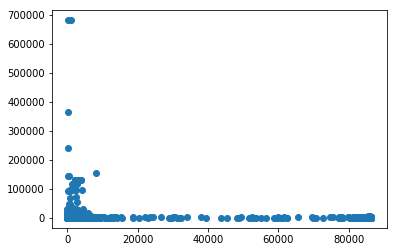

In [98]:
plt.scatter(y_test, y_pred)
# plt.xticks(x_axis)

plt.show()


In [ ]:
rmlse = calculate_error(y_pred, y_test)
print("the error for modle without date is: {}".format(rmlse))

## model with date

In [ ]:
y = df['trip_duration']
X = df.drop(['id', 'store_and_fwd_flag', 'trip_duration', 'pickup_datetime', 'dropoff_datetime'], axis=1)
# print  the number of occurance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
regr_date = RFR(n_estimators = 30,
          max_depth = 17,
          min_samples_split = 40,
          verbose = 2,
          random_state = 2)

regr_date.fit(X_train, y_train)
y_pred_date = regr_date.predict(X_test)


In [ ]:
plt.scatter(y_test, y_pred_date)
# plt.xticks(x_axis)

plt.show()

In [ ]:
rmlse = calculate_error(y_pred_date, y_test)
print("the error for modle without date is: {}".format(rmlse))

## try linear regression

In [104]:
from sklearn.linear_model import LinearRegression as lrg

clf = lrg()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

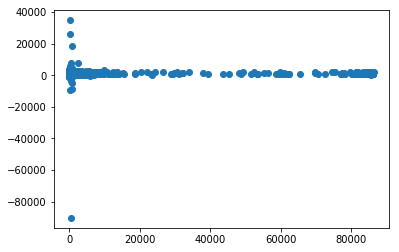

In [105]:
plt.scatter(y_test, y_pred)

plt.show()

In [106]:
rmlse = calculate_error(y_pred, y_test)
print("the error for modle without date is: {}".format(rmlse))

/home/zhangtong/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in log



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## predict on the test.csv

In [67]:
test = pd.read_csv('test.csv')
test.head()

test.pickup_datetime = pd.to_datetime(test.pickup_datetime)

In [68]:


test['pick_month'] = test.pickup_datetime.dt.month
test['pick_weekday'] = test.pickup_datetime.dt.weekday+1
test['pick_minuteofday'] = test.pickup_datetime.dt.hour*60 + test.pickup_datetime.dt.minute

In [69]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pick_month,pick_weekday,pick_minuteofday
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,6,4,1439
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,6,4,1439
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,6,4,1439
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,6,4,1439
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,6,4,1439


In [74]:
X = test.drop(['id', 'store_and_fwd_flag', 'pickup_datetime'], axis=1)

In [75]:
result = clf.predict(X)

ValueError: shapes (625134,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)